## PCA Exercise - Dimensionality reduction

We will test some of the dimensionality reduction techniques on sklearn's [Wine dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine).

_____________________
#### Part 1: Interpreting PCs

1. Load up the wine dataset and run a PCA over it. 
    - **Note:** Don't forget to scale your data and check for any missing values before running your PCA.


2. Extract the two best principal components (n_components=2). 

3. Create a 2D PCA Scatter Plot and colour code the different classes. Are there any clear separations of the various wine classes?

4. Create a loading plot with the two principal components. Identify which features influence PC-1 and which features influence PC-2. 

5. **Stretch** The combination of the previous two plots is called a PCA biplot. Create a PCA biplot.


In [28]:
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [16]:
dir(sklearn.datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class

In [20]:
wine = sklearn.datasets.load_wine()
wine_df = pd.DataFrame(wine.data, columns = wine.feature_names)
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [27]:
wine_df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [29]:
scaler = StandardScaler()

In [38]:
data = scaler.fit_transform(wine_df)
data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [39]:
pca = PCA(n_components=2)

In [40]:
pcs = pca.fit_transform(data)
pcs

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

In [46]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [47]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [45]:
pcs_df = pd.DataFrame(pcs, columns=["x", "y"])
pcs_df["class"] = wine.target
pcs_df

,x,y,class
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0
...,...,...,...
173,-3.370524,-2.216289,2
174,-2.601956,-1.757229,2
175,-2.677839,-2.760899,2
176,-2.387017,-2.297347,2


In [53]:
class_0x = pcs_df[pcs_df["class"].eq(0)][["x"]]
class_0y = pcs_df[pcs_df["class"].eq(0)][["y"]]
class_1x = pcs_df[pcs_df["class"].eq(1)][["x"]]
class_1y = pcs_df[pcs_df["class"].eq(1)][["y"]]
class_2x = pcs_df[pcs_df["class"].eq(2)][["x"]]
class_2y = pcs_df[pcs_df["class"].eq(2)][["y"]]

In [42]:
from matplotlib import pyplot

In [48]:
help(pyplot.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single nu

In [82]:
pca.components_[0]

array([ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
        0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
        0.29671456,  0.37616741,  0.28675223])

In [86]:
help(pyplot.arrow)

Help on function arrow in module matplotlib.pyplot:

arrow(x, y, dx, dy, **kwargs)
    Add an arrow to the axes.
    
    This draws an arrow from ``(x, y)`` to ``(x+dx, y+dy)``.
    
    Parameters
    ----------
    x, y : float
        The x and y coordinates of the arrow base.
    
    dx, dy : float
        The length of the arrow along x and y direction.
    
    width: float, default: 0.001
        Width of full arrow tail.
    
    length_includes_head: bool, default: False
        True if head is to be counted in calculating the length.
    
    head_width: float or None, default: 3*width
        Total width of the full arrow head.
    
    head_length: float or None, default: 1.5*head_width
        Length of arrow head.
    
    shape: ['full', 'left', 'right'], default: 'full'
        Draw the left-half, right-half, or full arrow.
    
    overhang: float, default: 0
        Fraction that the arrow is swept back (0 overhang means
        triangular shape). Can be negative or

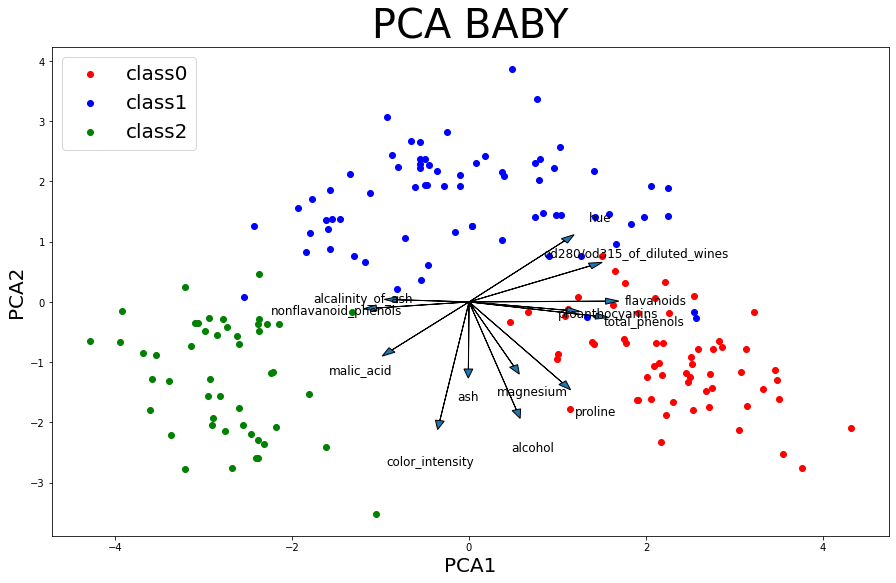

In [106]:
fig = pyplot.figure(figsize=(15,9))

pyplot.scatter(class_0x, class_0y, color="red", label="class0")
pyplot.scatter(class_1x, class_1y, color="blue", label="class1")
pyplot.scatter(class_2x, class_2y, color="green", label="class2")

for i in range(len(pca.components_[0])):
    pyplot.arrow(0,0,pca.components_[0][i]*4,pca.components_[1][i]*4, 
                 length_includes_head=True,
                head_width=0.1)
    pyplot.text(pca.components_[0][i]*5,pca.components_[1][i]*5,
               wine.feature_names[i],
               ha="center",
               va="center",
               fontsize=12)
#pyplot.scatter(pca.components_[0], pca.components_[1], color="black")

pyplot.title("PCA BABY", fontsize=40)
pyplot.xlabel("PCA1", fontsize=20)
pyplot.ylabel("PCA2", fontsize=20)

pyplot.legend(loc=2, prop={"size":20})

pyplot.show()

In [78]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283]])

_____________________
#### Part 2: PCA in practice
    
1. Plot a scree plot to determine the number of principal components you want to keep. Use the elbow rule.

2. Create a cumulative explained_variance_ratio plot. Determine the number of principal components you want to keep. Use the elbow rule. 

3. Refit your PCA with the chosen optimal number of principal components and project the principal components to a DataFrame. Also, you should name the columns of the DataFrame appropriately. 

4. Export the data with the new features to a CSV file. The number of rows should be the same as in the original dataset.

In [108]:
pca2 = PCA(n_components=len(wine.feature_names))

In [111]:
X = pca2.fit_transform(data)

In [113]:
dir(pca2)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_features_in_',
 'n_samples_',
 'noise_variance_',
 'random_state',
 'score',
 'scor

In [122]:
pca2.explained_variance_ratio_.cumsum()

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

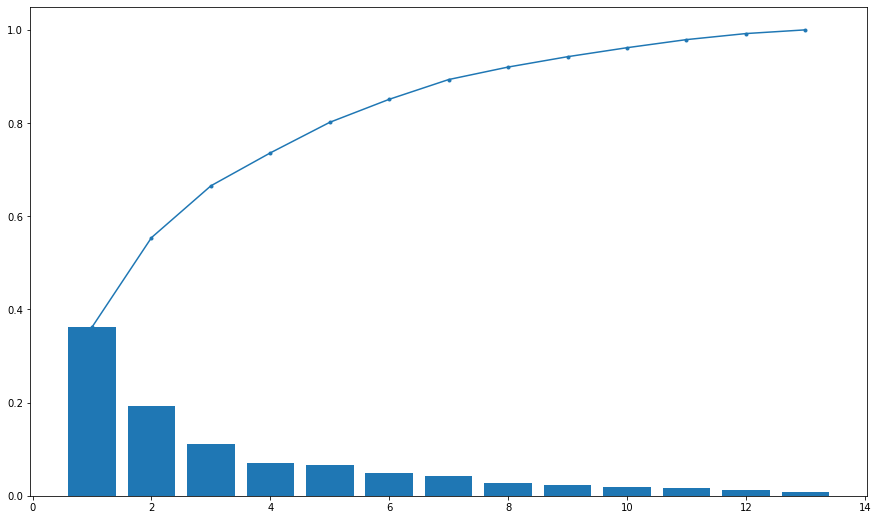

In [127]:
fig2 = pyplot.figure(figsize=(15,9))

pyplot.bar(x=range(1, pca2.n_components_ + 1,),
           height=pca2.explained_variance_ratio_)

pyplot.plot(range(1, pca2.n_components_ + 1),
            pca2.explained_variance_ratio_.cumsum(),
            marker="."
           )

pyplot.show()

In [121]:
help(pyplot.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

In [128]:
refitted_pca = PCA(n_components = 4)
refitted_data = refitted_pca.fit_transform(data)

In [131]:
df = pd.DataFrame(refitted_data, columns=["PCA 1", "PCA 2", "PCA 3", "PCA 4"])

In [132]:
df

,PCA 1,PCA 2,PCA 3,PCA 4
0,3.316751,-1.443463,-0.165739,-0.215631
1,2.209465,0.333393,-2.026457,-0.291358
2,2.516740,-1.031151,0.982819,0.724902
3,3.757066,-2.756372,-0.176192,0.567983
4,1.008908,-0.869831,2.026688,-0.409766
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527
174,-2.601956,-1.757229,0.207581,0.349496
175,-2.677839,-2.760899,-0.940942,0.312035
176,-2.387017,-2.297347,-0.550696,-0.688285


In [134]:
df.to_csv("PCA_csv.csv")

In [133]:
help(df.to_csv)

Help on method to_csv in module pandas.core.generic:

to_csv(path_or_buf: 'Optional[FilePathOrBuffer]' = None, sep: 'str' = ',', na_rep: 'str' = '', float_format: 'Optional[str]' = None, columns: 'Optional[Sequence[Label]]' = None, header: 'Union[bool_t, List[str]]' = True, index: 'bool_t' = True, index_label: 'Optional[IndexLabel]' = None, mode: 'str' = 'w', encoding: 'Optional[str]' = None, compression: 'CompressionOptions' = 'infer', quoting: 'Optional[int]' = None, quotechar: 'str' = '"', line_terminator: 'Optional[str]' = None, chunksize: 'Optional[int]' = None, date_format: 'Optional[str]' = None, doublequote: 'bool_t' = True, escapechar: 'Optional[str]' = None, decimal: 'str' = '.', errors: 'str' = 'strict', storage_options: 'StorageOptions' = None) -> 'Optional[str]' method of pandas.core.frame.DataFrame instance
    Write object to a comma-separated values (csv) file.
    
    .. versionchanged:: 0.24.0
        The order of arguments for Series was changed.
    
    Parameters

_________________________
#### Part 3: Stretch Activities (Optional)

1. Plot a variable correlation plot. 

    - **Hint:** We can create a scatter plot with 1st component on the x-axis and the second component on y-axis. 
    - **Hint:** The length of each component is equal to the number of columns (features) we have in our data before PCA. Points in the graph that are close to each other are similar features. We need to annotate the points with feature names.